In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the data using pandas
features=pd.read_csv("/kaggle/input/retaildataset/Features data set.csv")
sales=pd.read_csv("/kaggle/input/retaildataset/sales data-set.csv")
store_data=pd.read_csv("/kaggle/input/retaildataset/stores data-set.csv")


In [3]:
# get the summary
features.info('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [5]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [6]:
# merge the data to be in one table
df=sales.merge(features)
df=df.merge(store_data)
df=df.fillna(0)
df["Date"]=pd.to_datetime(df["Date"])
df.info()

/tmp/ipykernel_20/3064807276.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date"]=pd.to_datetime(df["Date"])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [7]:
# Overview of the numeric values
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [8]:
# have a look onto the data
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,2,2010-05-02,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2,1,3,2010-05-02,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
3,1,4,2010-05-02,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
4,1,5,2010-05-02,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


In [9]:
# using get dammies in pandas library to convert all the abject values to be a numeric
df_dum=pd.get_dummies(df)
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Size          421570 non-null  int64         
 15  Type_A        421

/tmp/ipykernel_20/2186783031.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_dum.corr(),annot=True)


<Axes: >

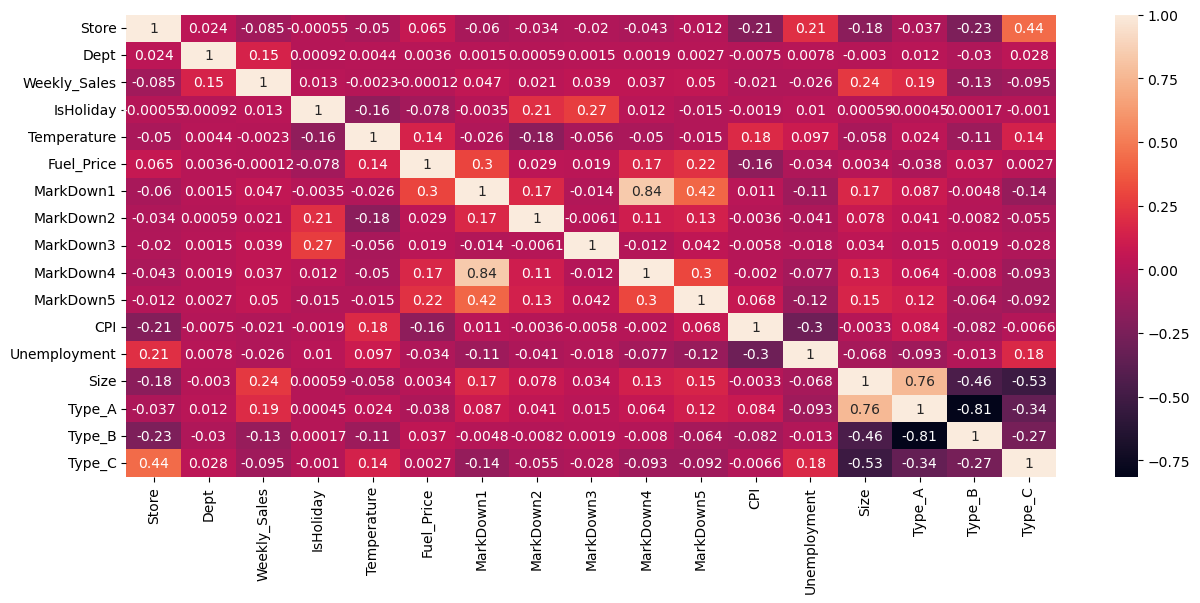

In [10]:
# use heatmap in seaborn to find out the correlation between the numeric data
plt.figure(figsize=(15,6))
sns.heatmap(df_dum.corr(),annot=True)

There is a high correlation between weekly sales and (Type A, Size) so we will make our analysis using this feature

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

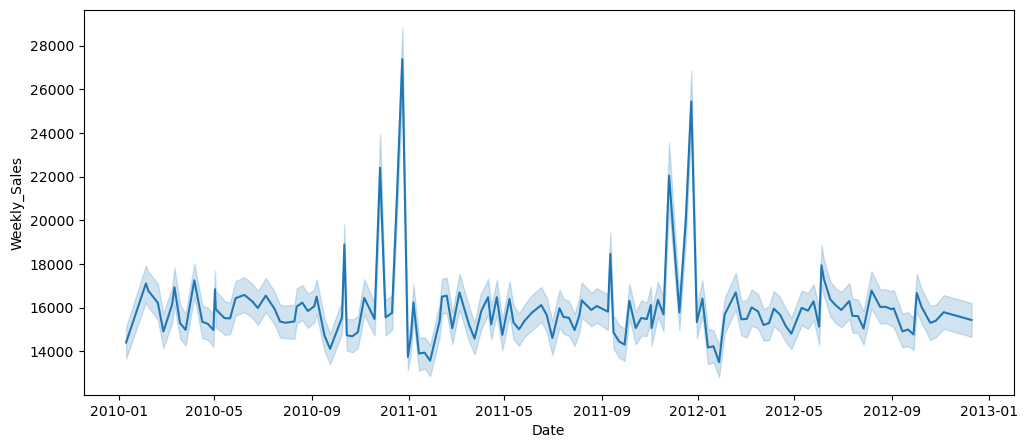

In [11]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df,x="Date",y="Weekly_Sales")

the above graph clarifies the sales over the years, the highest sales in the period in last quarter in 2010 and last quarter on 2011

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

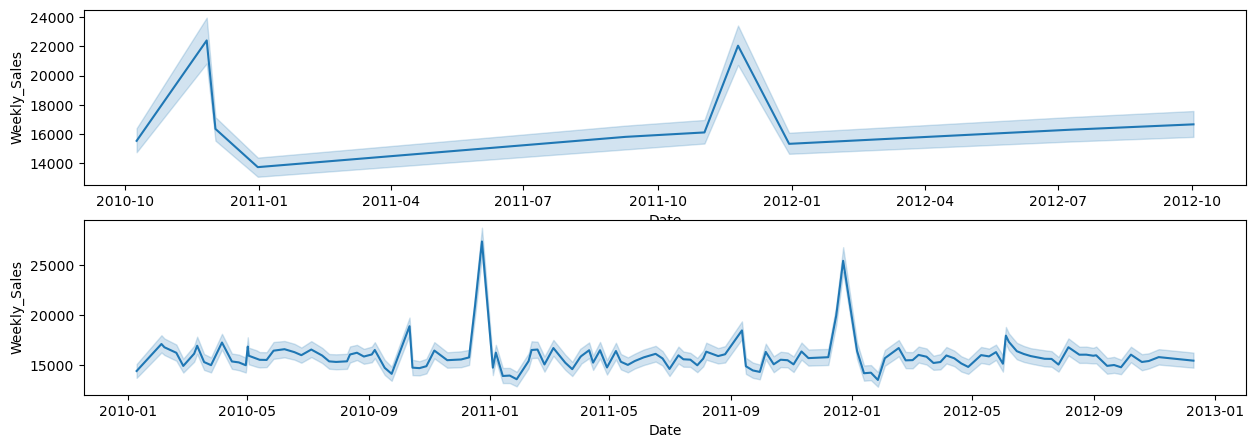

In [12]:
holiday_sales=df[df["IsHoliday"]==True]
not_holiday_sales=df[df["IsHoliday"]==False]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,5))
sns.lineplot(data=holiday_sales,x="Date",y="Weekly_Sales",ax=axs[0])
sns.lineplot(data=not_holiday_sales,x="Date",y="Weekly_Sales",ax=axs[1])

In [13]:
size=df.groupby(["Store","Size"])["Weekly_Sales"].sum().reset_index()
size['sales/1000'] = size['Weekly_Sales'] / 1000
size

,Store,Size,Weekly_Sales,sales/1000
0,1,151315,2.224028e+08,222402.80885
1,2,202307,2.753824e+08,275382.44098
2,3,37392,5.758674e+07,57586.73507
3,4,205863,2.995440e+08,299543.95338
4,5,34875,4.547569e+07,45475.68890
5,6,202505,2.237561e+08,223756.13064
6,7,70713,8.159828e+07,81598.27514
7,8,155078,1.299512e+08,129951.18113
8,9,125833,7.778922e+07,77789.21899
9,10,126512,2.716177e+08,271617.71389


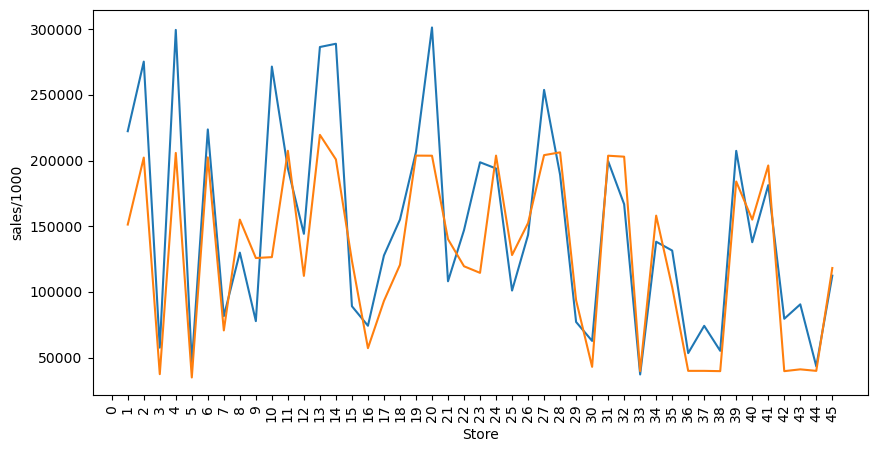

In [14]:
# Visulize the data using seaborn
plt.figure(figsize=(10,5))
sns.lineplot(data=size,x="Store",y="sales/1000")
sns.lineplot(data=size,x="Store",y="Size")
plt.tick_params(axis='x', labelrotation=90)
plt.xticks(range(0,46));

as we find above there is a highly relation between the size of the store and the weekly sales , so that the store size is very effective on the weekly sales

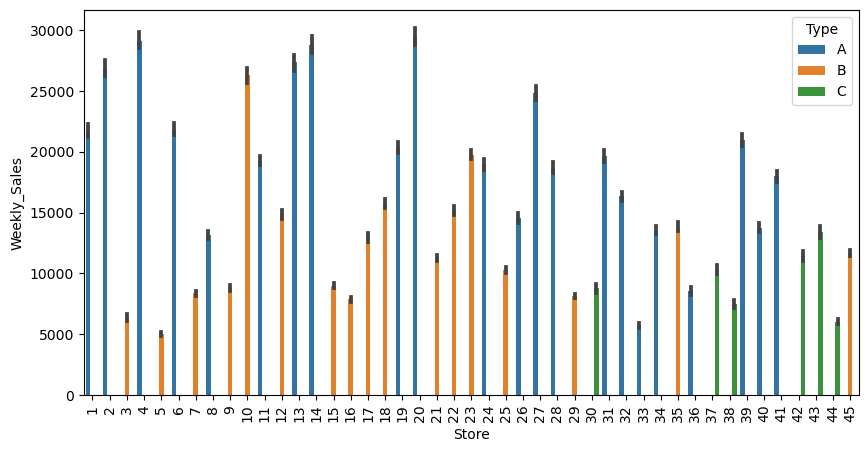

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="Store",y="Weekly_Sales",hue="Type")
plt.tick_params(axis='x', labelrotation=90);

There is no record in C type in the many stores.

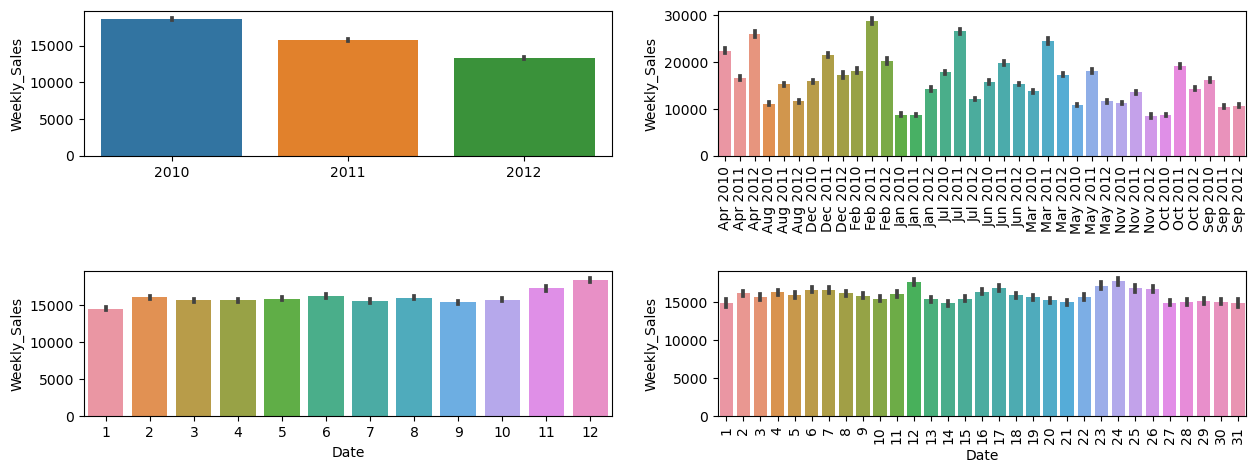

In [16]:
# Set the x-axis tick labels
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,5))

sns.barplot(y=df["Weekly_Sales"], x=sorted(df['Date'].dt.strftime('%Y')),ax=axs[0,0])
sns.barplot(y=df["Weekly_Sales"], x=sorted(df['Date'].dt.strftime('%b %Y')),ax=axs[0,1])
sns.barplot(data=df,y="Weekly_Sales",x=df["Date"].dt.month,ax=axs[1,0])
sns.barplot(data=df,y="Weekly_Sales",x=df["Date"].dt.day,ax=axs[1,1])

axs[0,1].tick_params(axis='x', labelrotation=90)
axs[1,1].tick_params(axis='x', labelrotation=90)
fig.subplots_adjust(bottom=0.07, hspace=0.8)

The above plots clarify the distribution of the sales yearly / monthly / daily

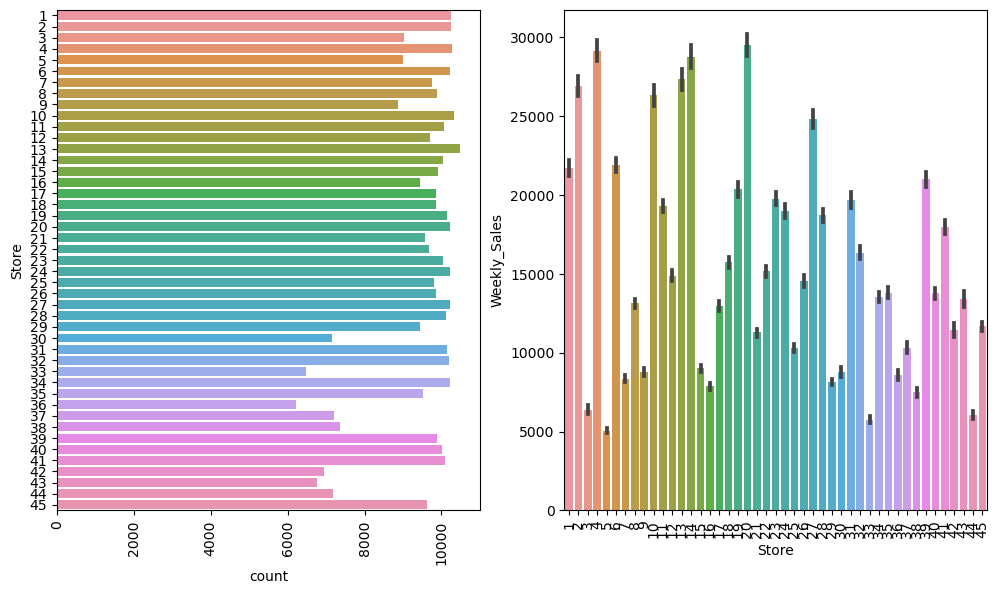

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6.5))

sns.countplot(data=df,y="Store",ax=axs[0])
sns.barplot(data=df,y="Weekly_Sales",x="Store",ax=axs[1])


axs[0].tick_params(axis='x', labelrotation=90)
axs[1].tick_params(axis='x', labelrotation=90);

The above plot is clarify the counts of the sales for each store and the weekly sales in each store

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [19]:
X= df_dum.drop(["Weekly_Sales","Store","Dept","Date"],axis=1)
y= df_dum["Weekly_Sales"]

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=2)

In [21]:
XGB = XGBRegressor()
XGB.fit(x_train, y_train)
predictions_XGB1 = XGB.predict(x_test)
print("Mean Absolute Error XGB model: " + str(mean_absolute_error(predictions_XGB1, y_test)))

Mean Absolute Error XGB model: 14313.635913690216


In [22]:
XGB = XGBRegressor()
XGB.fit(x_train, y_train, 
         early_stopping_rounds=5, 
         eval_set=[(x_test, y_test)],
         verbose=False)
predictions_XGB = XGB.predict(x_test)
print("Mean Absolute Error XGB model: " + str(mean_absolute_error(predictions_XGB, y_test)))

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Mean Absolute Error XGB model: 14241.888598891472


In [23]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
predictions_DT = DTR.predict(x_test)
print("Mean Absolute Error DecisionTree: " + str(mean_absolute_error(predictions_DT, y_test)))

Mean Absolute Error DecisionTree: 14442.267500401409


In [24]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
predictions_RFR = RFR.predict(x_test)
print("Mean Absolute Error RandomForest: " + str(mean_absolute_error(predictions_RFR, y_test)))

Mean Absolute Error RandomForest: 14444.644879728747


In [25]:
# using pandas dataframe to clarify the scores among each model.
pd.DataFrame({"Model Name":["XGBRegressor","DT","RF"],
              "mean_absolute_error":[mean_absolute_error(predictions_XGB, y_test),
                                    mean_absolute_error(predictions_DT, y_test),
                                    mean_absolute_error(predictions_RFR, y_test)]
             }
            )

,Model Name,mean_absolute_error
0,XGBRegressor,14241.888599
1,DT,14442.267500
2,RF,14444.644880
